In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFECV
from pycaret.classification import *
import warnings
import os

# Importação dos pacotes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *
import warnings
import os

In [3]:
warnings.filterwarnings('ignore')

# Importações das funções locais

In [4]:
os.chdir("../funcoes")
from feature import high_corr_drop, chi2_drop, low_var_drop, compute_chi2, binary_features
from my_classifier import Classifier
from my_plot import labs, central_trend
os.chdir("../notebooks")

# Leitura dos dados pré-processados

In [5]:
df = pd.read_csv('../dados/dados_preprocessados/Kaggle_Sirio_Libanes_ICU_Prediction.csv')

In [6]:
sns.set_style('darkgrid')

In [7]:
df.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,UNDER_30,30_40,50_70,ABOVE_80
0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.938950,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.183673,0.183673,0.183673,0.183673,-1.0,-0.868365,-0.868365,-0.868365,-0.868365,-1.0,-0.742004,-0.742004,-0

# Validação Cruzada

A validação cruzada é um método estatístico usado para estimar a habilidade dos modelos de aprendizado de máquina, portanto a fim de tentar resumir a performance de um modelo de Machine Learning e, escolher o melhor modelo para o problema em questão. Essa técnica consiste em realizar divisões dentro do dataset inteiro entre dados de treino e teste de forma const 

In [ ]:
![]('../img/dataml_cross_validation.png')

### RepeatedStratifiedKFold

porém realizando divisões no dataset de forma que as proporções da variável dependente se mantivessem as mais próximas possíveis em toda a divisão, e além disso realizando essa validação cruzada diversas vezes para que, com isso, consiga resumir a performance de um modelo da maneira mais realista possível.

## LogisticRegression

In [9]:
lr = Classifier(LogisticRegression, df, max_iter=100000)
lr.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=100000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [None]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.739             |ROC AUC MÉDIA         : 0.858
ROC AUC DESVIO PADRÃO : 0.086             |ROC AUC DESVIO PADRÃO : 0.007
ROC AUC ITERVALO      : 0.739 ± 0.024     |ROC AUC ITERVALO      : 0.858 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.705             |ACCURACY

In [10]:
lr2 = Classifier(LogisticRegression, df, [('feature_selection', chi2_drop())], max_iter=10000)
lr2.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=10000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [chi2_drop()]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.742             |ROC AUC MÉDIA         : 0.845
ROC AUC DESVIO PADRÃO : 0.087             |ROC AUC DESVIO PADRÃO : 0.008
ROC AUC ITERVALO      : 0.742 ± 0.024     |ROC AUC ITERVALO      : 0.845 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.714             |AC

In [11]:
lr3 = Classifier(LogisticRegression, df, [('feature_selection_high_corr', low_var_drop()),('feature_selection_chi2',chi2_drop())], max_iter=10000)
lr3.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=10000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [low_var_drop(threshold=None), chi2_drop()]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.742             |ROC AUC MÉDIA         : 0.845
ROC AUC DESVIO PADRÃO : 0.087             |ROC AUC DESVIO PADRÃO : 0.008
ROC AUC ITERVALO      : 0.742 ± 0.024     |ROC AUC ITERVALO      : 0.845 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA

In [12]:
lr4 = Classifier(LogisticRegression, df, [('feature_selection_high_corr', high_corr_drop()),('feature_selection_chi2',chi2_drop()),
                                        ('feature_selection_var', low_var_drop(0.0003608115413929402))], max_iter=10000)
lr4.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : LogisticRegression(max_iter=10000)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [high_corr_drop(threshold=None), chi2_drop(), low_var_drop(threshold=None)]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.759             |ROC AUC MÉDIA         : 0.828
ROC AUC DESVIO PADRÃO : 0.086             |ROC AUC DESVIO PADRÃO : 0.008
ROC AUC ITERVALO      : 0.759 ± 0.024     |ROC AUC ITERVALO      : 0.828 ± 0.002
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|-----------------------

In [13]:
lr.estimator

LogisticRegression(max_iter=100000)

<AxesSubplot:title={'left':'ROC CURVE\n'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

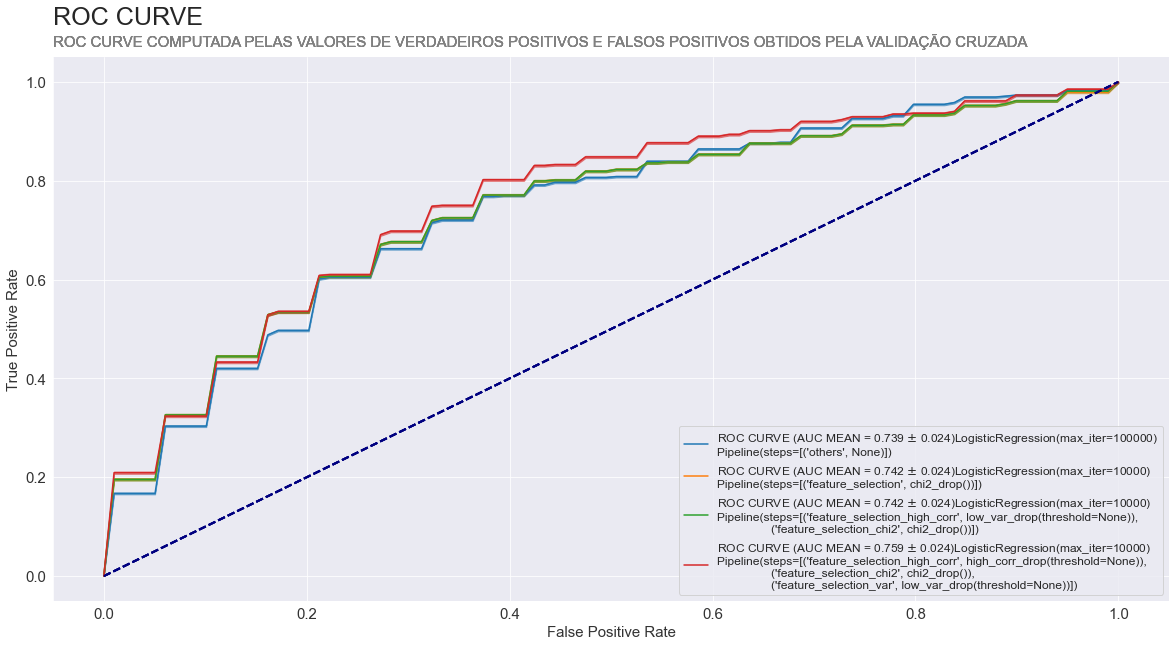

In [14]:
ax = lr.plot_roc_curve()
lr2.plot_roc_curve(ax=ax)
lr3.plot_roc_curve(ax=ax)
lr4.plot_roc_curve(ax=ax)

In [15]:
corr_drop = high_corr_drop()
chi2 = chi2_drop()
varth = low_var_drop(0.0003608115413929402)

In [16]:
X = df.drop('ICU', axis=1)
y = df['ICU']

In [17]:
X = varth.fit_transform(X)

In [18]:
X = corr_drop.fit_transform(X)

In [19]:
X = chi2.fit_transform(X, y)

In [20]:
df = pd.concat([X,y], axis=1)

In [21]:
df.head()

,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,ALBUMIN_MEDIAN,BE_VENOUS_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,UNDER_30,ABOVE_80,ICU
0,1,0.0,0.0,0.0,0.0,0.605263,-1.0,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,-0.932246,1.000000,-0.835844,-0.914938,-0.170732,-0.704142,-0.754601,-0.875236,0.363636,-0.540721,-0.518519,0.345679,-0.028571,-0.997201,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.898990,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,1
1,0,0.0,0.0,0.0,0.0,0.605263,-1.0,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,-0.959849,1.000000,-0.382773,-0.908714,-0.170732,-0.704142,-0.754601,-0.939887,0.363636,-0.399199,-0.703704,0.345679,0.085714,-0.995428,-0.846633,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,0.959596,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,1,0,1
2,0,0.0,0.0,0.0,0.0,-0.263158,-1.0,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.959849,-0.828421,-0.729239,-0.836100,-0.170732,-0.633136,-0.779141,-0.503592,0.363636,-0.564753,-0.777778,0.580247,0.200000,-0.989549,-0.846633,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.878788,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0
3,0,0.0,0.0,0.0,0.0,0.605263,-1.0,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,-0.959849,1.000000,-0.702202,-0.641079,-0.170732,-0.704142,-0.754601,-0.990926,0.363636,-0.457944,-0.592593,0.345679,0.142857,-0.998507,-0.846633,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.939394,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,1,0,0
4,0,0.0,0.0,0.0,0.0,0.605263,-1.0,-0.317073,-0.938950,-1.0,0.357143,-0.891012,-0.742004,-0.958528,-0.891993,0.291405,-0.959849,1.000000,-0.706450,-0.340249,-0.170732,-0.704142,-0.754601,-0.997732,0.363636,-0.292390,-0.666667,0.345679,0.085714,-0.997947,-0.846633,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,0.919192,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,1,0,0


# RandomForestClassifier

In [22]:
rf = Classifier(RandomForestClassifier, df, max_depth=8)
rf.cross_val()

  0%|          | 0/50 [00:00<?, ?it/s]

5 repetições de Validação Cruzada com 10 divisões no dataset
----------------------------------------------------------------------------------
CLASSIFICADOR                           : RandomForestClassifier(max_depth=8)
DEMAIS TAREFAS EXECUTADAS PELO PIPELINE : [None]
------------------------------------------|---------------------------------------
Métricas no dataset de teste:             | Métricas no dataset de treino: 
------------------------------------------|---------------------------------------
ROC AUC MÉDIA         : 0.771             |ROC AUC MÉDIA         : 1.000
ROC AUC DESVIO PADRÃO : 0.074             |ROC AUC DESVIO PADRÃO : 0.000
ROC AUC ITERVALO      : 0.771 ± 0.021     |ROC AUC ITERVALO      : 1.000 ± 0.000
DE CONFIÂNCIA DE 95%                      |DE CONFIÂNCIA DE 95%
  
DEMAIS MÉTRICAS                           |DEMAIS MÉTRICAS
------------------------------------------|---------------------------------------
ACCURACY  MÉDIA       : 0.720             |ACCURACY

In [23]:
x = []
y = []
for col, imp in zip(df.columns, rf.estimator.feature_importances_):
    x.append(imp)
    y.append(col)

In [24]:
importances = pd.DataFrame({'column':y, 'importance':x})

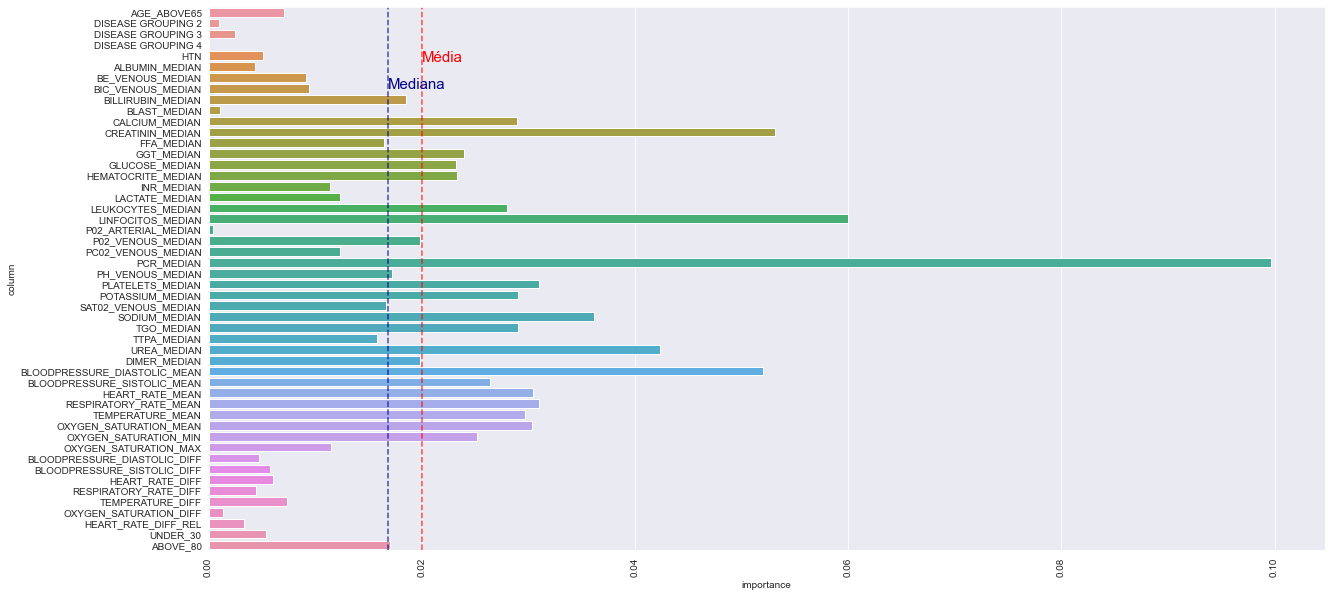

In [25]:
fig,ax=plt.subplots(figsize=(20,10))
sns.barplot(x='importance', y='column', data=importances,ax=ax)
plt.sca(ax)
plt.xticks(rotation=90)
central_trend(importances['importance'], ax)
plt.show()

# PyCaret

In [31]:
pycaret_clf = setup(data = df,  
                    session_id = 1582,
                    target = 'ICU', 
                    feature_selection=True, 
                    fold_strategy=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=64541),
                    feature_interaction=True,
                    data_split_shuffle=True,
                    data_split_stratify=True)

,Description,Value
0,session_id,1582
1,Target,ICU
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(294, 51)"
5,Missing Values,False
6,Numeric Features,43
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
top3_clf = compare_models(n_select = 3,sort='AUC')

IntProgress(value=0, description='Processing: ', max=69)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:27:05
Status,. . . . . . . . . . . . . . . . . .,Fitting 50 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


In [28]:
lightgbm = tune_model(top3_clf[0], n_iter=100, optimize='recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.8558,0.8750,0.8750,0.8750,0.7981,0.7981
1,0.8571,0.9231,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.8095,0.8942,0.7500,0.7500,0.7500,0.5962,0.5962
3,0.8095,0.9286,0.8571,0.6667,0.7500,0.6000,0.6124
4,0.9048,0.9592,0.8571,0.8571,0.8571,0.7857,0.7857
5,0.9000,0.8681,0.8571,0.8571,0.8571,0.7802,0.7802
6,0.8500,0.8681,0.5714,1.0000,0.7273,0.6341,0.6814
7,0.7000,0.7582,0.4286,0.6000,0.5000,0.2941,0.3026
8,0.8000,0.7692,0.4286,1.0000,0.6000,0.4937,0.5725
9,0.9000,0.9670,1.0000,0.7778,0.8750,0.7938,0.8112


In [29]:
gbc = tune_model(top3_clf[1], n_iter=100, optimize='recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7885,0.6250,0.5556,0.5882,0.3099,0.3114
1,0.8571,0.8942,0.7500,0.8571,0.8000,0.6897,0.6934
2,0.7143,0.8558,0.5000,0.6667,0.5714,0.3636,0.3721
3,0.9048,0.9388,0.8571,0.8571,0.8571,0.7857,0.7857
4,0.9048,0.9286,0.8571,0.8571,0.8571,0.7857,0.7857
5,0.8000,0.7912,0.7143,0.7143,0.7143,0.5604,0.5604
6,0.9500,0.9670,0.8571,1.0000,0.9231,0.8864,0.8921
7,0.8000,0.8132,0.5714,0.8000,0.6667,0.5294,0.5447
8,0.8000,0.8352,0.4286,1.0000,0.6000,0.4937,0.5725
9,0.8000,0.9011,0.8571,0.6667,0.7500,0.5876,0.6005


In [30]:
ada = tune_model(top3_clf[2], n_iter=100, optimize='recall')

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:27:05
Status,. . . . . . . . . . . . . . . . . .,Fitting 50 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 50 folds for each of 100 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1514 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 2806 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 3556 tasks      | elapsed:  7.2min


KeyboardInterrupt: 

In [ ]:
stack_models(clfs_tuned.values())